# Bouncing Ball Example


The aim of this notebook is to detail the experimentation results for modifying and optimizing the parameters of a
bouncing ball model. This model is taken from the examples of the PyFMI library (https://pypi.org/project/PyFMI/), which simulates models using the Functional Mock-up Interface (FMI) standard (https://fmi-standard.org). The intent of the FMI standard is to present system components as black boxes, where internal details are hidden. This is representative of industrial systems with intellectual property concerns.

The bouncing ball equations and initial parameters are:

In [1]:
%%latex
\begin{equation}
\frac{dh}{dt} = v; \frac{dv}{dt} = -g;\\
\mathit{when}~h < 0~\mathit{then}~v := -e * v;\\
\mathit{initial:}~e = 0.7, g = 9.81
\end{equation}

Import PyFMI and load the Bouncing Ball FMU:

In [2]:
from pyfmi import load_fmu
model = load_fmu('bouncingBall.fmu')

Set the initial height to 100, and simulate for 20 seconds:

In [3]:
model.set('h',100)
result = model.simulate(final_time = 20.)

Define a plot function `plot(result)`:

In [4]:
def plot(res):
    # Plot the height
    import pylab as P

    # Retrieve the result for the variables
    h_res = res['h']
    v_res = res['v']
    t     = res['time']

    plot_vel = False
    fig = P.figure(figsize=(3, 1.75),)
    P.clf()
    
    if plot_vel:
        P.subplot(2,1,1)
    
    P.plot(t, h_res)
    P.ylabel('Height (m)')
    P.xlabel('Time (s)')
    
    if plot_vel:
        # Plot the velocity
        P.subplot(2,1,2)
        P.plot(t, v_res)
        P.ylabel('Velocity (m/s)')
        P.xlabel('Time (s)')
    P.suptitle('FMI Bouncing Ball')
    P.show()

In [5]:
plot(result)

<Figure size 300x175 with 1 Axes>

## Parameter Exploration
Reset the model, set the height to 200, and simulate. This experimentation could be repeated to explore the behaviour of the bouncing ball

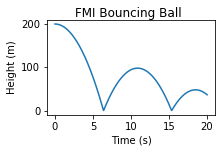

In [6]:
model.reset()
model.set('h',200)
result = model.simulate(final_time = 20.)
plot(result)

## Parameter Optimization
The goal is to determine a height such that the ball bounces precisely halfway through the simulation. First, define a function to return the height at that time.

In [7]:
def halfway_height(init_h):
    model.reset()
    model.set('h', init_h)
    result = model.simulate(final_time=20.)
    halfway_index = len(result['h'])//2
    return result['h'][halfway_index]

Then, use an optimization library to choose a height between 50 and 200 metres which minimizes that height.

In [8]:
import scipy
opt_result = scipy.optimize.brute(halfway_height, ranges=((50, 200),))
print(opt_result)

[84.91985522]


When the ball starts off at around 85 m high, it will bounce at time 10. Plot these results to confirm.

Height: -0.1144333719996773


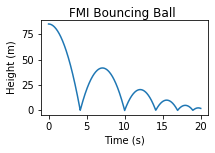

In [9]:
h = 84.91985522
model.reset()
model.set('h', h)
res = model.simulate(final_time=20.)
print("Height: " + str(halfway_height(h)))
plot(res)